In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install --upgrade scikit-learn


In [3]:
data=pd.read_csv('C://Users//Vedashree//Downloads//archive (7)//spam.csv',encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
# Data cleaning
# EDA
# Text preprocessing
# model building
# evaluation
# website
# deploy

 ## Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.sample(5)

,v1,v2
3080,ham,Have a great trip to India. And bring the ligh...
4951,spam,"Welcome to Select, an O2 service with added be..."
3746,ham,ÌÏ neva tell me how i noe... I'm not at home i...
4093,ham,how are you? I miss you!
5265,ham,Gud ni8.swt drms.take care


In [10]:
# rename cols
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
data['target']=encoder.fit_transform(data['target'])

In [13]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
data.isna().sum()

target    0
text      0
dtype: int64

In [15]:
data.duplicated().sum()

403

In [16]:
# remove duplicates
data=data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

0

## EDA

In [18]:
data.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1ea71c2ad60>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

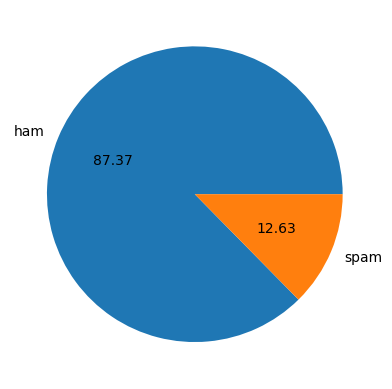

In [19]:
plt.pie(data.target.value_counts(), labels=['ham','spam'],autopct='%0.2f')

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vedashree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data['num_chars']=data['text'].apply(len) 
#gives the length of each text

C:\Users\Vedashree\AppData\Local\Temp\ipykernel_7408\2871675151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_chars']=data['text'].apply(len)


In [23]:
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# get the no of words

data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Vedashree\AppData\Local\Temp\ipykernel_7408\1822965321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
data

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [26]:
# get the no of sentences

data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Vedashree\AppData\Local\Temp\ipykernel_7408\3196982351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
data

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
data[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
data[data.target==0][['num_chars','num_words','num_sent']].describe()
# output of describe function for non spam messages

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
data[data.target==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
# we can see that spam messages are bigger in size as compared to non spam/

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

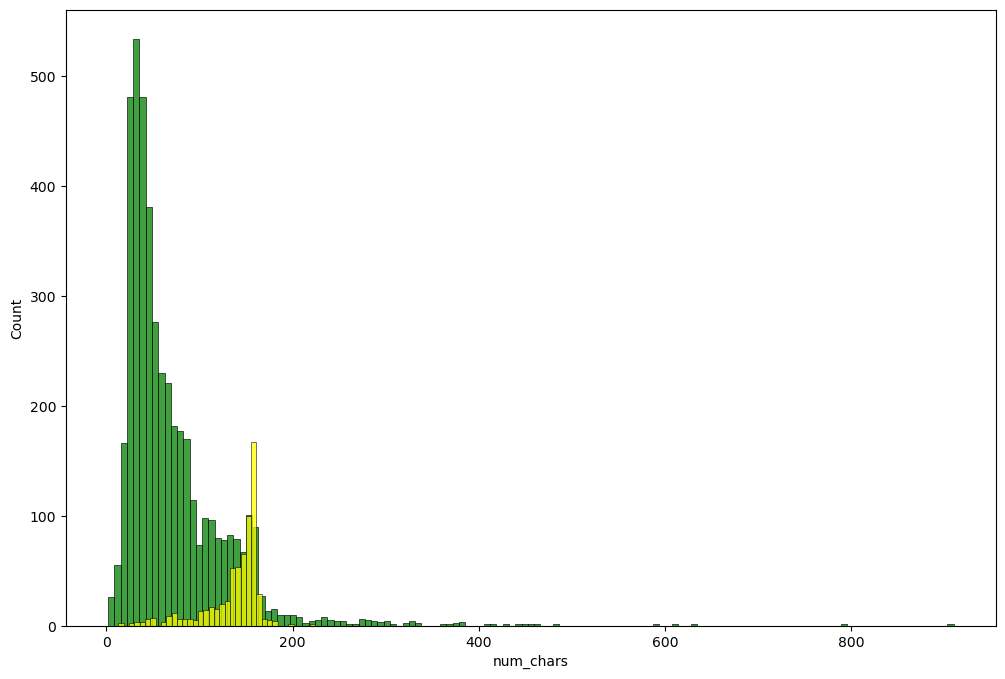

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(data[data.target==0]['num_chars'], color='green')
sns.histplot(data[data.target==1]['num_chars'], color='yellow')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

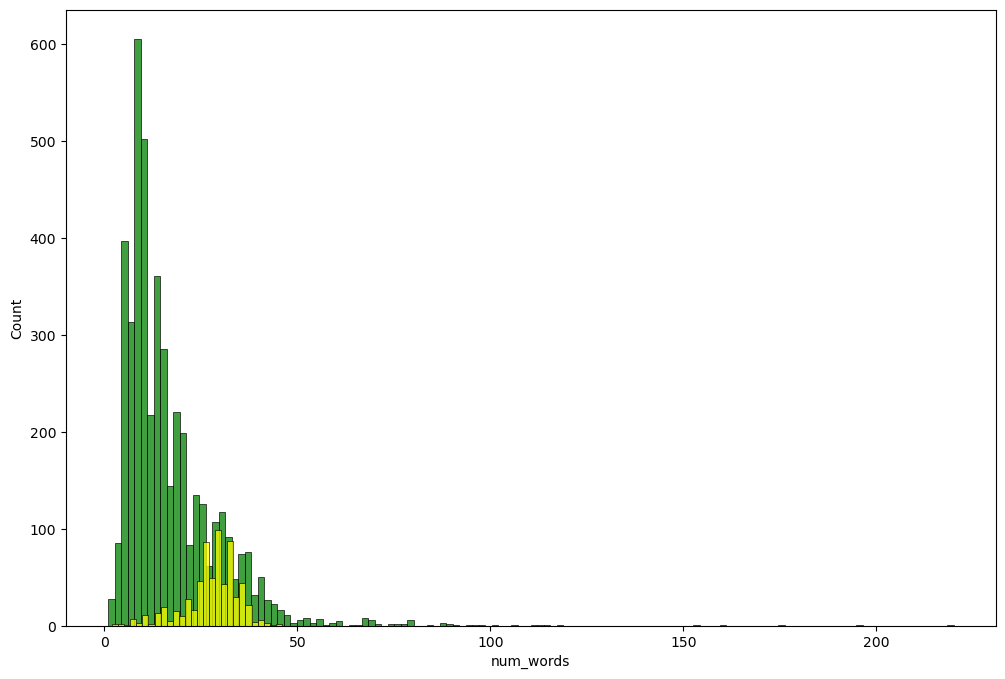

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(data[data.target==0]['num_words'], color='green')
sns.histplot(data[data.target==1]['num_words'], color='yellow')

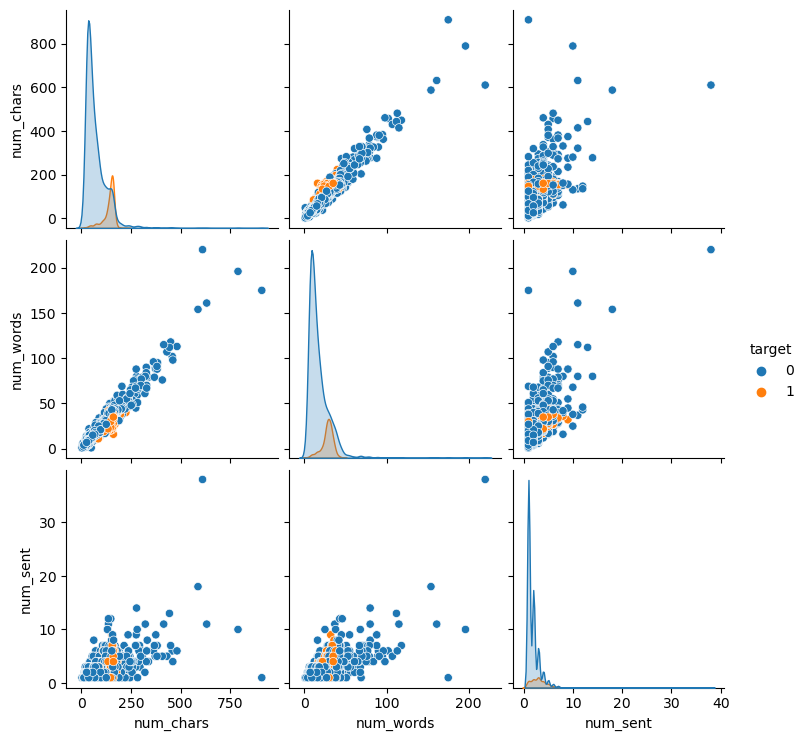

In [34]:
sns.pairplot(hue='target',data=data)

<AxesSubplot:>

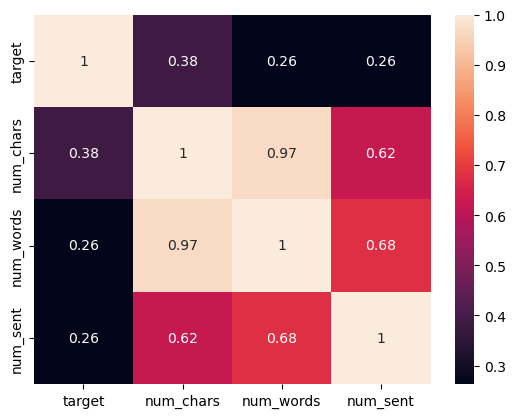

In [35]:
sns.heatmap(data.corr(),annot=True)

## Data preprocessing
lower case\
tokenization\
removing special chars, stopwords, punctuations\
stemming

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



In [37]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [38]:
transform_text('HIIIIIIII ThEre20%% Vedashree and Arushi. Where are you all going?')

'hiiiiiiii there20 vedashre arushi go'

In [39]:
transform_text(data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
data['transformed_teext']=data.text.apply(transform_text)

C:\Users\Vedashree\AppData\Local\Temp\ipykernel_7408\2305754192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_teext']=data.text.apply(transform_text)


In [41]:
data.head()

,target,text,num_chars,num_words,num_sent,transformed_teext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud

In [43]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [44]:
spam_wc=wc.generate(data[data.target==1]['transformed_teext'].str.cat(sep=" "))

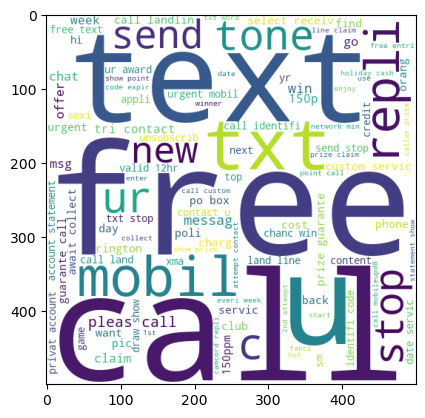

In [45]:
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(data[data.target==0]['transformed_teext'].str.cat(sep=" "))

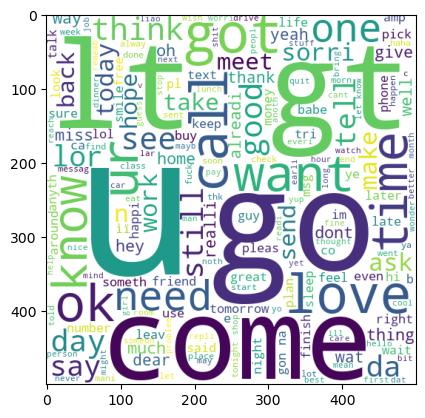

In [47]:
plt.imshow(ham_wc)

In [48]:
data.head()

,target,text,num_chars,num_words,num_sent,transformed_teext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in data[data.target==1]['transformed_teext'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

C:\Users\Vedashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

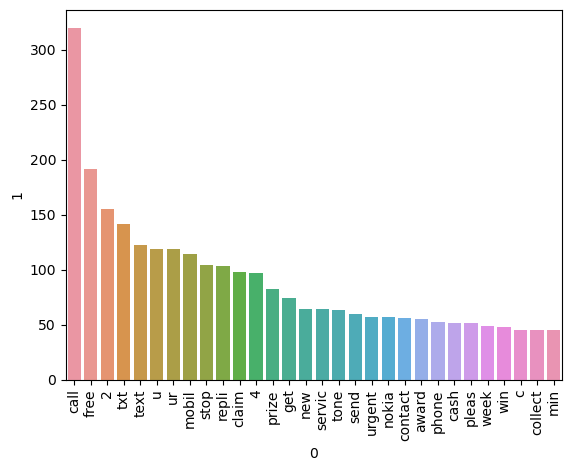

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [52]:
ham_corpus = []
for msg in data[data.target==0]['transformed_teext'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Vedashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

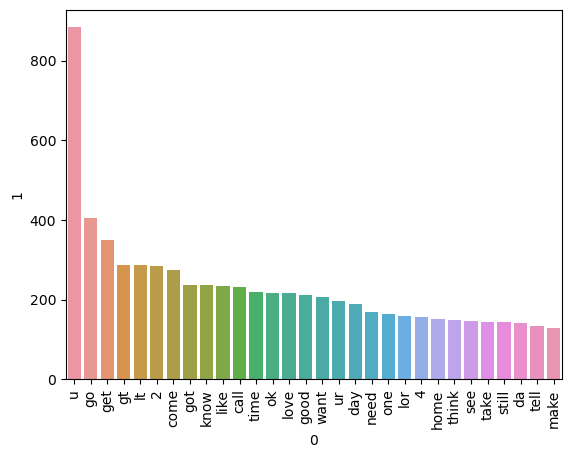

In [53]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

## Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
# bag of words
tfidf=TfidfVectorizer(max_features=3000) #tfidf

In [55]:
X=cv.fit_transform(data['transformed_teext']).toarray()

In [56]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
y=data['target'].values

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score

In [61]:
gnb =GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [62]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test, y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [63]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test, y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [64]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [65]:
X2=tfidf.fit_transform(data['transformed_teext']).toarray()

In [66]:
X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y,test_size=0.2, random_state=42)

In [67]:
gnb.fit(X_train2, y_train2)
y_pred12= gnb.predict(X_test2)
print(accuracy_score(y_test2, y_pred12))
print(confusion_matrix(y_test2 , y_pred12))
print(precision_score(y_test2, y_pred12))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [68]:
mnb.fit(X_train2, y_train2)
y_pred22= mnb.predict(X_test2)
print(accuracy_score(y_test2, y_pred22))
print(confusion_matrix(y_test2 , y_pred22))
print(precision_score(y_test2, y_pred22))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [69]:
# we will keep Tfidf with Multinomial Naive bayes

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc= SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=42)
abc= AdaBoostClassifier(n_estimators=50, random_state=42)
bc= BaggingClassifier(n_estimators=50, random_state=42)
etc= ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb= XGBClassifier(n_estimators=50, random_state=42)

In [72]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
from sklearn.metrics import precision_score


In [74]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc, X_train2, y_train2,X_test2, y_test2)

(0.97678916827853, 0.9548872180451128)

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train2,y_train2,X_test2,y_test2)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9168278529980658
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9830508474576272
For  AdaBoost
Accuracy -  0.9158607350096711
Precision -  0.8085106382978723
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [78]:
performance_df= pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,\
                             'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [79]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.916828,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.970019,0.983051
9,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.961315,0.877698
4,LR,0.946809,0.868852
3,DT,0.933269,0.827586


In [ ]:
# Improving the model

In [80]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [81]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.916828
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.970019
4,GBDT,Accuracy,0.946809
5,SVC,Accuracy,0.976789
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.946809
9,DT,Accuracy,0.933269


In [82]:
temp_df= pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores,\
                             'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [83]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.916828,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.970019,0.983051
9,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.961315,0.877698
4,LR,0.946809,0.868852
3,DT,0.933269,0.827586


In [84]:
new_df=performance_df.merge(temp_df, on='Algorithm')

In [85]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.916828,1.000000,0.916828,1.000000
1,NB,0.972921,0.991597,0.972921,0.991597
2,ETC,0.977756,0.984127,0.977756,0.984127
3,RF,0.970019,0.983051,0.970019,0.983051
4,GBDT,0.946809,0.968750,0.946809,0.968750
5,SVC,0.976789,0.954887,0.976789,0.954887
6,xgb,0.968085,0.937500,0.968085,0.937500
7,BgC,0.961315,0.877698,0.961315,0.877698
8,LR,0.946809,0.868852,0.946809,0.868852
9,DT,0.933269,0.827586,0.933269,0.827586


In [257]:
# create a voting classifier
# it is basically a combination of multiple algorithms

In [86]:
rfc= RandomForestClassifier(n_estimators=50, random_state=42)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=42)

from sklearn.ensemble import VotingClassifier

In [87]:
voting= VotingClassifier(estimators=[('rf',rfc),('nb',mnb),('et',etc)], voting ='soft')

In [88]:
voting.fit(X_train2, y_train2)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))],
                 voting='soft')

In [89]:
y_pred_v=voting.predict(X_test2)
print("Accuracy",accuracy_score(y_test2,y_pred_v))
print('Precision', precision_score(y_test2,y_pred_v))

Accuracy 0.9777562862669246
Precision 1.0


In [90]:
import pickle
pickle.dump(tfidf, open('vectorizer2.pkl','wb'))
pickle.dump(voting, open('model2.pkl','wb'))

In [91]:
import sklearn
print(sklearn.__version__)


1.6.0
